In [36]:
from skopt.benchmarks import hart6
"""The six dimensional Hartmann function defined on the unit hypercube.

It has six local minima and one global minimum f(x*) = -3.32237 at
x* = (0.20169, 0.15001, 0.476874, 0.275332, 0.311652, 0.6573).

More details: <http://www.sfu.ca/~ssurjano/hart6.html>
"""
from sklearn.metrics.scorer import mean_absolute_error as error_func
import skopt
import hyperopt
import numpy as np


In [37]:
def log(l, *a, **k):
    print(*a, **k)

In [38]:
true_x = [0.20169, 0.15001, 0.476874, 0.275332, 0.311652, 0.6573]
true_y = -3.32237
class Target:
    def __init__(self, error_level=1):
        self.error_level = error_level
        self.records = []
        self.space = [(-1.0, 1.0)] * 6
        self.x = None
        
    def target(self, x):
        log(4, 'loop', len(self.records))
        log(4, 'new_x', x)
        log(4, 'error of x', error_func(true_x, x))
        res_true = hart6(x)
        res = res_true + np.random.randn() * self.error_level
        log(4, 'output score', res)
        log(4, 'true score', res_true)
        self.records.append({
            'idx': len(self.records),
            'x': x, 
            'x_error': error_func(true_x, x),
            'y_true': res_true,
            'y_output': res
        })
        return res

In [39]:
methods = {
    'BaysionOptimize': skopt.gp_minimize, 
#     'RandomSearch': , 
#     'TreeP'
}
results = {}
for method in methods:
    t = Target()
    results[method] = t
    print(methods[method])
    methods[method](t.target, t.space)

<function gp_minimize at 0x7f26cf922158>
new_x [0.24028584502430883, 0.34733720551170744, 0.31311061530445983, -0.90363847147075571, 0.16525973991220622, -0.61878704506269377]
error of x 0.500189368642
output score 0.230171673158
true score -6.35993142095e-08
new_x [0.71747233886607442, 0.37049622420057293, -0.92903100756901114, -0.12284326051861538, -0.58088594779366343, -0.60652288250133068]
error of x 0.782784943575
output score 2.16076268897
true score -1.38864802477e-06
new_x [-0.49110053988037228, 0.97034538933702663, 0.37963880872075073, 0.059175112647370742, -0.42181625671991463, -0.31232168462852816]
error of x 0.588267991533
output score 0.00896506302855
true score -2.33217688713e-07
new_x [-0.22955148778263612, -0.31717391149140717, -0.91758536862577533, 0.39401703039929292, -0.42832620111436537, 0.067723099238990558]
error of x 0.623520816696
output score -1.06538248864
true score -2.86739630517e-07
new_x [-0.62476897157096101, 0.74474831873246772, -0.24131184229277602, -0.

new_x [-0.37479085666269074, 0.99979029232601768, -0.75078181911839847, 0.39974965063092721, -0.84669037667473102, -1.0]
error of x 0.932329499235
output score -2.19707830874
true score -1.54924996879e-11
new_x [0.58288776466556125, 0.97154204813025724, -0.70077816458447872, 0.39795494509087148, -0.87138593096615891, -0.99957579690411036]
error of x 0.890486441724
output score 0.976445378811
true score -2.9232735145e-07
new_x [0.099417697343384834, 0.99994962597507353, -0.79907786176101703, 0.3941554881601067, -0.84054990797219808, -0.87847886212077564]
error of x 0.839161341441
output score -1.43663959312
true score -2.63359623024e-06
new_x [-0.56659475528180869, 0.20218625298277071, 0.52546687999844366, 0.69719056484557484, -0.48346754236471012, -0.21402698903740447]
error of x 0.492893164085
output score 1.16775163166
true score -4.59127440024e-07
new_x [0.75682830654244937, 1.0, -0.53395455074605924, 0.3838535794705823, 0.249639033342689, -0.90048948023971498]
error of x 0.69071348

new_x [-0.47336476175779474, -0.68104517571589751, 0.41244463659733177, 0.31347438944662365, -0.56420905735344529, -0.93464360628005561]
error of x 0.679414392326
output score -0.629533603419
true score -4.84353307309e-13
new_x [0.066797749058261524, -0.89502378163594021, -0.80972533045131889, 0.33489027445308611, -1.0, -1.0]
error of x 0.915839272914
output score -0.180471541565
true score -5.81865630429e-19
new_x [0.12965282830654962, 0.32212755170492668, -0.74400523389121509, -0.90870222483983121, -1.0, -0.95627402674096817]
error of x 0.929049034812
output score 0.311817241119
true score -1.51672405473e-17
new_x [-0.38670484681737466, -0.46109835932938809, -0.74864040764506168, 0.33708388282559604, -0.846937178790381, -1.0]
error of x 0.883776445901
output score -0.34261640784
true score -5.16132079024e-18
new_x [0.081963005780632925, 0.26475059692597136, -0.70610400282762886, 0.39347327269903815, -1.0, -0.99178567575062704]
error of x 0.749387423737
output score 0.189942412011
tru

In [43]:
results['BaysionOptimize'].records[-1]

{'idx': 99,
 'x': [0.078413951310287625,
  1.0,
  -0.76608204201288943,
  0.19191903243675038,
  -0.95348777883948244,
  -1.0],
 'x_error': 0.87034580618422241,
 'y_output': -0.83686517641564118,
 'y_true': -2.3810337356464986e-08}

In [6]:
print(res_gp)

          fun: -0.00508911288366444
    func_vals: array([ -1.04998615e-20,  -4.48885563e-23,  -1.03383695e-12,
        -5.08911288e-03,  -5.00088708e-10,  -4.19803489e-04,
        -1.73499448e-09,  -7.79591760e-09,  -5.91048228e-07,
        -5.28017268e-05,  -9.16522853e-25,  -7.28597279e-16,
        -1.98943915e-09,  -1.06229510e-16,  -7.59583658e-12,
        -5.47614778e-26,  -1.22090650e-10,  -2.93033958e-10,
        -2.09963180e-19,  -7.42628325e-11,  -1.26903873e-22,
        -2.61172375e-22,  -2.10216506e-09,  -2.59762573e-20,
        -1.12638695e-06,  -9.55568301e-17,  -1.13135197e-18,
        -1.37274458e-06,  -1.38753071e-17,  -5.60224601e-30,
        -1.63009844e-10,  -2.48603429e-20,  -7.28597279e-16,
        -1.13135197e-18,  -1.13400242e-13,  -1.37274458e-06,
        -1.75305071e-17,  -5.60224601e-30,  -2.48603429e-20,
        -3.32109041e-09,  -5.58398883e-19,  -7.59583658e-12,
        -7.67594931e-20,  -9.55568301e-17,  -9.35498529e-20,
        -2.82096689e-32,  -4.96712

In [7]:
hart6(res_gp.x)

-0.00508911288366444

In [9]:
from matplotlib import pylab as plt
from skopt.plots import plot_convergence
plot_convergence(res_gp)

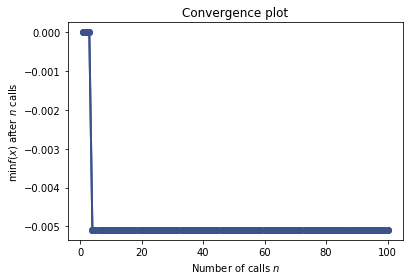

In [10]:
plt.show()